In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [19]:
df = pd.read_csv('daily_final_data.csv')

In [20]:
df=df.drop(columns='Unnamed: 0')
df.head()

,air_area_name,genre_name,visitors,current_week,day_of_week,holidays
0,Tōkyō-to Minato-ku Shibakōen,Dining bar,6,0,Monday,0
1,Tōkyō-to Minato-ku Shibakōen,Izakaya,12,0,Monday,0
2,Tōkyō-to Minato-ku Shibakōen,Dining bar,6,0,Monday,0
3,Tōkyō-to Minato-ku Shibakōen,Italian/French,3,0,Monday,0
4,Tōkyō-to Minato-ku Shibakōen,Izakaya,6,0,Monday,0


In [21]:

ic_air_ml_df = df.loc[df["visitors"]==0]
ic_air_ml_df.head(5)

remove_area = ['Hokkaidō Katō-gun Motomachi',
 'Niigata-ken Kashiwazaki-shi Chūōchō',
 'Fukuoka-ken Fukuoka-shi Tenjin',
 'Tōkyō-to Meguro-ku Takaban',
 'Tōkyō-to Chiyoda-ku Kanda Jinbōchō',
 'Tōkyō-to Musashino-shi Midorichō',
 'Tōkyō-to Adachi-ku Chūōhonchō',
 'Tōkyō-to Kōtō-ku Tomioka',
 'Hokkaidō Sapporo-shi Atsubetsuchūō 1 Jō',
 'Tōkyō-to Edogawa-ku Chūō',
 'Hokkaidō Sapporo-shi Kita 24 Jōnishi',
 'Tōkyō-to Fuchū-shi Miyanishichō',
 'Ōsaka-fu Ōsaka-shi Ōhiraki',
 'Niigata-ken Niigata-shi Teraohigashi',
 'Ōsaka-fu Ōsaka-shi Nanbasennichimae',
 'Fukuoka-ken Kitakyūshū-shi Konyamachi',
 'Hyōgo-ken Amagasaki-shi Higashinanamatsuchō',
 'Tōkyō-to Musashino-shi Kichijōji Honchō',
 'Tōkyō-to Taitō-ku Asakusa',
 'Ōsaka-fu Suita-shi Izumichō',
 'Tōkyō-to Toshima-ku Sugamo',
 'Tōkyō-to Meguro-ku Jiyūgaoka',
 'Fukuoka-ken Fukuoka-shi Imaizumi',
 'Tōkyō-to Shibuya-ku Higashi',
 'Tōkyō-to Setagaya-ku Kitazawa']

In [22]:
for area in remove_area:
    df = df[df.air_area_name != area]

In [23]:
group = df.groupby(['current_week', 'air_area_name','genre_name', 'day_of_week'])
df = pd.DataFrame(group['visitors'].sum())
df = df.reset_index()
df.head()

,current_week,air_area_name,genre_name,day_of_week,visitors
0,0,Fukuoka-ken Fukuoka-shi Daimyō,Bar/Cocktail,Friday,56
1,0,Fukuoka-ken Fukuoka-shi Daimyō,Bar/Cocktail,Monday,22
2,0,Fukuoka-ken Fukuoka-shi Daimyō,Bar/Cocktail,Saturday,132
3,0,Fukuoka-ken Fukuoka-shi Daimyō,Bar/Cocktail,Sunday,37
4,0,Fukuoka-ken Fukuoka-shi Daimyō,Bar/Cocktail,Thursday,42


In [24]:
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()
#df['visit_date'] = number.fit_transform(area_df["visit_date"].astype('str'))
df["day_of_week"] = number.fit_transform(df["day_of_week"].astype('str'))
df["genre_name"] = number.fit_transform(df["genre_name"].astype('str'))
df["air_area_name"] = number.fit_transform(df["air_area_name"].astype('str'))

df.head()

,current_week,air_area_name,genre_name,day_of_week,visitors
0,0,0,1,0,56
1,0,0,1,1,22
2,0,0,1,2,132
3,0,0,1,3,37
4,0,0,1,4,42


In [25]:
y = df['visitors']
X = df.drop(columns= 'visitors')
X = X.values
X

array([[ 0,  0,  1,  0],
       [ 0,  0,  1,  1],
       [ 0,  0,  1,  2],
       ...,
       [52, 77, 13,  4],
       [52, 77, 13,  5],
       [52, 77, 13,  6]], dtype=int64)

In [26]:
# #Normalizes values in a list (weak against large outliers)
# def min_max_normalize(lst):
#     minimum = min(lst)
#     maximum = max(lst)
#     normalized = []
#     for val in lst:
#         normalized.append((val-minimum)/(maximum-minimum))
#     return normalized

In [27]:
# #Normalize values in df
# new_dict = {}

# for id in df.columns:
#     new_dict[id] = min_max_normalize(df[id])
        
# #create normalized df
# new_df = pd.DataFrame(new_dict)

# new_df.head()

In [28]:
from sklearn.model_selection import train_test_split
#split data to training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [29]:
from sklearn.neighbors import KNeighborsRegressor
#create regeressor 
regressor = KNeighborsRegressor(n_neighbors=5, weights='distance')

In [30]:
regressor.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='distance')

In [31]:
#predict training
#predict = regressor.predict(X_train)

In [32]:
test_predict = regressor.predict(X_test)

In [33]:
#Test R2
regressor.score(X_test, y_test)

0.6030468212156121

k: 1, Train/Test Score: 1.000/0.271
k: 3, Train/Test Score: 0.779/0.583
k: 5, Train/Test Score: 0.743/0.583
k: 7, Train/Test Score: 0.665/0.513
k: 9, Train/Test Score: 0.593/0.466
k: 11, Train/Test Score: 0.541/0.426
k: 13, Train/Test Score: 0.499/0.393
k: 15, Train/Test Score: 0.463/0.365
k: 17, Train/Test Score: 0.431/0.344
k: 19, Train/Test Score: 0.406/0.329


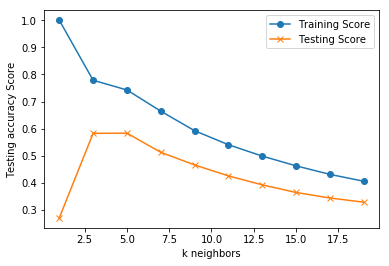

In [34]:
#Check for optimal k
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o',label="Training Score")
plt.plot(range(1, 20, 2), test_scores, marker="x", label="Testing Score")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.legend()
plt.show()